<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=800>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [35]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=15)

In [37]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train,y_train, test_size=0.25,random_state=15)

In [38]:
rbf=SVC(kernel="rbf",C=100,gamma=0.001) # svc classifier with rbf kernel

In [39]:
rbf.fit(x_train,y_train)

SVC(C=100, gamma=0.001)

In [40]:
sup_vecs=rbf.support_vectors_
dual_coefs=rbf.dual_coef_
intercept=rbf.intercept_

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [89]:
#https://stackoverflow.com/questions/28503932/calculating-decision-function-of-svm-manually
def decision_function(x_cv,gamma):
    predict=[]
    decision=[]
    for xq in x_cv:
        dec_func = 0
        for j in range(len(sup_vecs)):
            norm2 = np.linalg.norm(sup_vecs[j, :] -xq)**2  # calculating the kernel K(xi,xq)
            dec_func = dec_func + dual_coefs[0, j] * np.exp(-gamma*norm2)  # calculating the sign
        dec_func += intercept
        decision.append(dec_func)
        if (dec_func)<0:
           predict.append(0)
        else:
          predict.append(1)
    return np.array(predict),decision        

In [90]:
gamma=0.001
f_cv,decision=decision_function(x_cv,gamma)
print(f_cv)

[1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1
 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0
 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 

In [91]:
print(np.array(decision).T)

[[ 9.78553590e-01 -1.11760405e+00 -2.04720532e+00 -3.09565428e+00
  -2.79889732e+00 -3.19223178e+00 -3.06506013e+00 -2.65326082e+00
   3.33031294e+00 -1.27804286e+00  1.23713395e+00 -2.26620102e+00
   1.15545642e+00  1.55336237e+00 -3.18756150e-01  1.20293177e+00
   1.88290414e+00  1.19637781e+00 -2.78451489e-01 -2.12325762e+00
   1.96221487e+00 -4.75759780e-01  1.08589552e+00 -2.55752818e+00
  -2.89278575e+00 -2.43600679e+00 -3.82456176e+00 -2.45783486e+00
  -2.27106674e+00 -1.23683699e+00 -1.16338685e+00 -2.10126553e+00
  -1.80723683e+00 -2.97522570e+00 -1.78272899e+00 -2.57605838e+00
   1.08577450e+00 -1.38072948e-01 -2.30545739e+00 -2.29909830e+00
   7.42068597e-01 -2.97019249e+00 -2.90071729e+00  1.41309686e+00
   2.78861618e+00 -1.89767766e+00 -1.98425643e+00 -1.45561992e+00
  -2.89596097e+00 -2.67027549e+00 -2.39828370e+00 -3.04643574e+00
  -1.56860504e+00  3.60540603e-01 -1.74975096e+00 -1.77366133e+00
  -2.78686913e+00 -2.13619233e+00 -1.90398564e+00  1.33960705e+00
  -3.24020

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


Start from start creating dataset

In [66]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
 n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=15)

In [69]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train,y_train, test_size=0.25,random_state=15)

In [70]:
rbf=SVC(kernel="rbf",C=100,gamma=0.001)

In [71]:
rbf.fit(x_train,y_train)

SVC(C=100, gamma=0.001)

In [72]:
gamma=0.001

In [73]:
sup_vecs=rbf.support_vectors_
dual_coefs=rbf.dual_coef_
intercept=rbf.intercept_

In [74]:
def decision_function(x_cv,gamma):
    predict=[]
    decision=[]
    for xq in x_cv:
        dec_func = 0
        for j in range(len(sup_vecs)):
            norm2 = np.linalg.norm(sup_vecs[j, :] -xq)**2 # calculating the kernel(K(xi,xq)
            dec_func = dec_func + dual_coefs[0, j] * np.exp(-gamma*norm2) # calculating the sign
        dec_func += intercept
        decision.append(dec_func)
        if (dec_func)<0: ##https://stackoverflow.com/questions/28503932/calculating-decision-function-of-svm-manually
           predict.append(0)
        else:
           predict.append(1)
    return np.array(decision) 


In [75]:
f_cv=decision_function(x_cv,gamma) # calculating f_cv based on decision function

In [76]:
def sigmoid(w,x,b):
 return 1/(1+np.exp(-(np.dot(x,w.T)+b))) #return 1/1+e(-x)

In [77]:
def logloss(w,x,y,b,reg=0):
 val=sigmoid(w,x,b)
 return -np.mean(y*np.log10(val)+(1-y)*np.log10(1-val))+reg # cost function of logistic regression

In [78]:
#As mentioned in Plat Calibration
count_one=list(y_cv).count(1)
count_zero=list(y_cv).count(0) # calculating y+ and y-
y_plus=(count_one+1)/(count_one+2)
y_minus=1/(count_zero+2)

In [79]:
## This function convert y_cv into y+,y-
def update(y_cv,y_plus,y_minize):
 u_cv=[]
 for point in y_cv: 
     if point==1:
        u_cv.append(y_plus)
     else:
        u_cv.append(y_minize)
 return(np.array(u_cv)) 

In [80]:
y_cv=update(y_cv,y_plus,y_minus)

In [81]:
#Initialize all
w = np.zeros_like(f_cv[0])# initial weight vector
b = 0 # initial intercept value
eta0 = 0.0001 # learning rate
alpha = 0.0001 # lambda value
N = len(f_cv)
print(len(y_cv))
print(N)

1000
1000


In [82]:
ini=logloss(w,f_cv,y_cv,b)
print("Initial log loss =",ini)

Initial log loss = 0.3010299956639812


SGD alorithm for calculating optimal w and b

In [83]:
def sgd_algo(f_cv,y_cv,eta0,alpha,w,b,epoch):
    t=0.001 # tolerence
    test_loss=[]
    epoc=[]
    for i in range(0,epoch):
        epoc.append(i)
        for j in range(0,N):
            reg=alpha/2*np.dot(w.T,w) #regulrization term
            w = ((1-eta0*(alpha/N))*w)+((eta0*f_cv[j])*(y_cv[j]-sigmoid(w,f_cv[j],b))) # updating weight vector
            b = b+(eta0*(y_cv[j]-sigmoid(w,f_cv[j],b))) # updatind intercept
        test=logloss(w,f_cv,y_cv,b,reg)
        test_loss.append(test)
        if i<=t :
           continue

           if abs(test_loss[i]-test_loss[i-1])>t: # block to check convergence
              continue
           else:
              break
    return w,b,epoc,test_loss

In [84]:
epoch=45
we,be,epo,loss=sgd_algo(f_cv,y_cv,eta0, alpha,w,b,epoch)
print(epo,loss)
print("optimal weight = ",we)
print("optimal intercept = ",be)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44] [0.2663579424550975, 0.23962495439992312, 0.21877000031509722, 0.2022539777413285, 0.18896436040726172, 0.17810442204580987, 0.16910158455582394, 0.16154015264900567, 0.15511429245642008, 0.14959572379994837, 0.14481155991575648, 0.14062901162990205, 0.13694471967170885, 0.13367722263364418, 0.13076156895931007, 0.1281454116356454, 0.1257861409319977, 0.12364875306894009, 0.12170424716028726, 0.11992840597831064, 0.11830085884837209, 0.11680435423358757, 0.11542418981836151, 0.11414776207479688, 0.11296420733036411, 0.11186411353501861, 0.11083928711649357, 0.10988256310216038, 0.10898764947891951, 0.10814899883975262, 0.10736170192360428, 0.10662139883349814, 0.10592420461575049, 0.10526664657259265, 0.10464561121359803, 0.10405829916629496, 0.10350218669144044, 0.10297499270470489, 0.1024746504096923, 0.101999282809

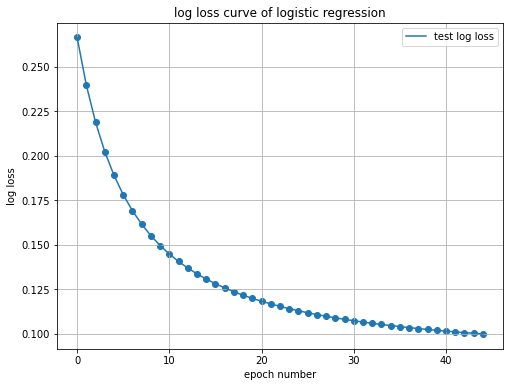

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epo,loss, label='test log loss')
plt.scatter(epo,loss)
plt.title('log loss curve of logistic regression')
plt.xlabel('epoch number')
plt.ylabel("log loss")
plt.legend()

In [86]:
ftest=decision_function(x_test,gamma)

In [87]:
def probability(ftest,w,b):
  p=1/(1+np.exp(-w*ftest+b)) # to calculate probilty P(Y=1|X)
  return p

In [88]:
prob=probability(ftest,we,be)
print(prob[:10])

[[0.23774793]
 [0.91674083]
 [0.26904252]
 [0.67529715]
 [0.00228871]
 [0.92508048]
 [0.18246605]
 [0.90426885]
 [0.18869581]
 [0.88038215]]
